# ML

A computer program is said to learn from experience E 
with respect to some class of tasks T 
and performance measure P 
if its performance at tasks in T, as measured by P, improves with experience E.

# Working with data

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


# Load Data

In [3]:
#df = pd.read_csv('dataset/20_newgroups.csv')
df = pd.read_excel('dataset/20_newgroups.xlsx')

# this is a quick fixup for illegal characters
df = df.applymap(lambda x: bytes(x, "utf-8").decode("unicode_escape") if isinstance(x, str) else x)

# Inspect and Explore Data

In [4]:
df.head()

,content,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,sci.space


In [5]:
df.head(10)

,content,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,sci.space
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,talk.politics.guns
6,From: bmdelane@quads.uchicago.edu (brian manni...,sci.med
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,comp.sys.ibm.pc.hardware
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,comp.os.ms-windows.misc
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,comp.sys.mac.hardware


In [6]:
df.shape

(11314, 2)

In [7]:
df.columns

Index(['content', 'target'], dtype='object')

In [8]:
df.iloc[10]

content    From: irwin@cmptrc.lonestar.org (Irwin Arnstei...
target                                       rec.motorcycles
Name: 10, dtype: object

In [9]:
df.content.iloc[10]

'From: irwin@cmptrc.lonestar.org (Irwin Arnstein)\nSubject: Re: Recommendation on Duc\nSummary: What\'s it worth?\nDistribution: usa\nExpires: Sat, 1 May 1993 05:00:00 GMT\nOrganization: CompuTrac Inc., Richardson TX\nKeywords: Ducati, GTS, How much? \nLines: 13\n\nI have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs\nvery well, paint is the bronze/brown/orange faded out, leaks a bit of oil\nand pops out of 1st with hard accel.  The shop will fix trans and oil \nleak.  They sold the bike to the 1 and only owner.  They want $3495, and\nI am thinking more like $3K.  Any opinions out there?  Please email me.\nThanks.  It would be a nice stable mate to the Beemer.  Then I\'ll get\na jap bike and call myself Axis Motors!\n\n-- \n-----------------------------------------------------------------------\n"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx\nirwin@cmptrc.lonestar.org    DoD #0826          (R75/6)\n-------------------------------------------

In [10]:
print(df.content.iloc[10])

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

In [11]:
# range
df[100:110]

,content,target
100,From: tchen@magnus.acs.ohio-state.edu (Tsung-K...,misc.forsale
101,"From: exuptr@exu.ericsson.se (Patrick Taylor, ...",sci.electronics
102,From: gharriso@hpcc01.corp.hp.com (Graeme Harr...,rec.motorcycles
103,From: horton@molbio.cbs.umn.edu (Robert Horton...,comp.sys.mac.hardware
104,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...,talk.politics.mideast
105,From: dtmedin@catbyte.b30.ingr.com (Dave Medin...,sci.electronics
106,From: ravin@eecg.toronto.edu (Govindan Ravindr...,sci.electronics
107,From: bell@hops.larc.nasa.gov (John Bell)\nSub...,sci.electronics
108,From: pallis@server.uwindsor.ca (PALLIS DIMIT...,comp.graphics
109,From: lorne@sun.com (Lorne R. Johnson - Sun IC...,misc.forsale


In [12]:
# number of classes and their counts
df.target.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
comp.windows.x              593
sci.space                   593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: target, dtype: int64

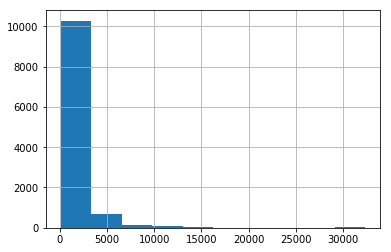

In [13]:
df.content.str.len().hist()

In [14]:
# shuffle
df = df.sample(frac=1)

# Vectorize all

In [15]:
vect = TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(1, 2))

In [16]:
r = vect.fit_transform(df.content)

In [18]:
r.shape

(11314, 109477)

In [19]:
vect.vocabulary_

{'ac': 5212,
 'dal': 26454,
 'ca': 19155,
 'my': 60900,
 'predictions': 73116,
 'classic': 22182,
 'playoff': 72044,
 'year': 108147,
 'dalhousie': 26464,
 'university': 100071,
 'halifax': 41701,
 'nova': 63928,
 'scotia': 80531,
 'canada': 19914,
 '73': 3832,
 'here': 43615,
 'is': 48855,
 'yet': 108332,
 'another': 10193,
 'prediction': 73114,
 'for': 36429,
 'them': 93738,
 'great': 40824,
 'playoffs': 72052,
 'you': 108438,
 'may': 57588,
 'laugh': 53607,
 'at': 13078,
 'your': 108928,
 'convenience': 24726,
 'adams': 5720,
 'division': 29204,
 'hate': 42346,
 'ne': 61718,
 'name': 61403,
 'bos': 17427,
 'vs': 102418,
 'buf': 18113,
 'are': 11222,
 'hot': 44974,
 'lately': 53556,
 'mon': 59653,
 'que': 74973,
 'this': 94924,
 'will': 105471,
 'be': 14650,
 'series': 81542,
 'watch': 103312,
 'first': 35838,
 'round': 79096,
 'bit': 16762,
 'biased': 16455,
 'but': 18396,
 'feel': 35181,
 'canadiens': 19944,
 'up': 100381,
 'start': 85341,
 'playing': 72031,
 'they': 94401,
 'playe

# Train a simple classifier on the features

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
clf = MultinomialNB()

In [22]:
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
clf.fit(r, df.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
# we now have a trained (fitted) classifier
# can we use it to predict?

In [32]:
picked_sample = 1235
expected_target = df.target.iloc[picked_sample]
expected_target

'comp.sys.mac.hardware'

In [34]:
s=df.content.iloc[picked_sample]
print(s)

From: b91926@fnclub.fnal.gov (David Sachs)
Subject: Re: Apple Tape backup 40SC under System 7.x
Organization: Fermi National Accelerator Laboratory, Batavia IL
Lines: 15
Distribution: usa
NNTP-Posting-Host: fnclub.fnal.gov
Keywords: backup, tape,

In article <generous.734035090@nova>, generous@nova.sti.nasa.gov (Curtis Generous) writes:
|> 
|> I need to get an Apple 40SC tape backup unit working under
|> Sys 7.0.x, but do not have any drivers/software to access
|> the device.  Does anyone know where I can fidn the tools
|> to access this device?
|> 
|> Appreciate any info/comments.
|> 
|> --curtis
|> -- 
|> Curtis C. Generous	generous@sti.nasa.gov		(703) 685-1140
|> NASA STI, Code JTT, Washington, DC 20546

Retrospect (Dantz) works nicely with this combination. You can buy it from the mail order vendors.



In [35]:
feats = vect.transform([s])
feats

<1x109477 sparse matrix of type '<class 'numpy.float64'>'
	with 128 stored elements in Compressed Sparse Row format>

In [40]:
predicted_target = clf.predict(feats)
predicted_target

array(['comp.sys.mac.hardware'], dtype='<U24')

In [42]:
# is it correct?
expected_target == predicted_target[0]

True

# Evaluate the Classifier

In [43]:
y_pred = clf.predict(vect.transform(df.content))

In [50]:
# lets look at the first 10 predictions
y_pred[:10]

array(['rec.sport.hockey', 'misc.forsale', 'alt.atheism',
       'soc.religion.christian', 'talk.politics.mideast',
       'talk.politics.mideast', 'rec.sport.baseball', 'comp.graphics',
       'comp.graphics', 'talk.politics.mideast'], dtype='<U24')

In [46]:
df.target[:10]

5713           rec.sport.hockey
4636               misc.forsale
4094                alt.atheism
8762     soc.religion.christian
7777      talk.politics.mideast
11270     talk.politics.mideast
2458         rec.sport.baseball
3429              comp.graphics
11104             comp.graphics
9787      talk.politics.mideast
Name: target, dtype: object

In [47]:
# just compare how many predictions were right
r = (y_pred[:10] == df.target[:10])
r

5713     True
4636     True
4094     True
8762     True
7777     True
11270    True
2458     True
3429     True
11104    True
9787     True
Name: target, dtype: bool

In [49]:
# add up all the true answers
r.sum()

10

In [52]:
# add them all up
r = (y_pred == df.target)
r.shape

(11314,)

In [53]:
r.sum()

10692

In [54]:
r.sum() / r.shape[0]

0.945023864238996

In [56]:
# so we go right 94% this easily ?!
# NO, where did we do a huge mistake?

# Train Test Split 

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X=df['content'].astype(str).values
y=df['target'].astype(str).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [60]:
X_train.shape

(9051,)

In [61]:
X_test.shape

(2263,)

In [62]:
y_train.shape

(9051,)

In [63]:
y_test.shape

(2263,)

In [64]:
#
vect = TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(1, 2))
clf = MultinomialNB()

In [66]:
# train
vect.fit(X_train)
clf.fit(vect.transform(X_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
# predict
y_pred = clf.predict(vect.transform(X_test))

In [70]:
# compare y_test with y_pred
r = (y_pred == y_test).sum()
r

1919

In [69]:
y_pred.shape

(2263,)

In [71]:
# correct 84%
r / y_pred.shape[0]

0.8479893946089262

# Summary

pandas = offers data structures and operations for manipulating numerical tables and time series.

pandas allows you to slice and dice the data

all operations care made on arrays (not on individual items)

working with classifiers is an easy 2 step process: 1) train 2) predict

we want to evaluate how good our trained model is

NEVER EVER test on the train data ! use train_test_split or similar